### Part A

### Imports

In [32]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import KFold,RepeatedStratifiedKFold, cross_val_score, GridSearchCV
import missingno as msno
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Load the data to a data frame

In [34]:
df = pd.read_csv('/content/CE802_P3_Data.csv')
print(df.head())
print("Data set dimensions: ", df.shape)

        F1     F2     F3       F4        F5     F6      F7      F8     F9  \
0 -1888.62  43.65  10.03  5386.98       Low -13.48  234.72  -42.47   0.02   
1 -1448.88  60.27   5.60  6561.28    Medium -23.98  576.96  -79.76  11.28   
2 -1508.16  40.71   3.68  3263.18      High -22.73   38.33 -178.61   2.04   
3 -1044.92  30.39  10.98  2599.90  Very low -13.43   96.28  -71.76   1.88   
4  -874.74  42.06   5.25  2744.29  Very low -16.37  531.44  -63.07   0.74   

      F10  ...      F26      F27  F28    F29    F30     F31      F32    F33  \
0 -747.90  ...  3654.32  1507.83   14   2.85  45.72 -375.27 -1824.45  -4.06   
1 -452.22  ...  4591.18  2032.71   12  -2.34  36.98 -342.75 -2306.35  -7.75   
2 -626.91  ...  2746.76  2675.88   12  -0.39 -46.89 -376.29 -2082.68  -9.82   
3 -716.49  ...  4543.34  2910.84   10 -16.08 -37.59 -437.52 -2453.57  -6.72   
4 -723.57  ...  2807.08  4308.36    6  -1.74   5.01 -442.47 -2553.16 -12.71   

     F34  Target  
0 -57.78   21.70  
1 -64.50  365.14  
2 -60

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
F1,1400.0,-763.488100,621.478480,-2558.16,-1196.8000,-764.400,-352.5400,1726.48
F2,1400.0,40.986043,12.930025,-26.34,34.7850,40.920,47.1150,111.60
F3,1400.0,3.991636,2.816555,0.05,1.8975,3.320,5.4325,17.34
F4,1400.0,5041.658621,2995.345402,-5835.15,3063.8050,5075.995,7134.9225,15040.56
F6,1400.0,-17.659264,4.139950,-40.88,-19.7125,-17.660,-15.6100,1.74
F7,1400.0,253.833400,300.542318,-715.98,49.8700,242.615,460.6950,1209.88
F8,1400.0,-85.992043,29.922194,-191.71,-105.2225,-85.660,-65.9700,16.16
F9,1400.0,209.176343,3027.431031,0.00,0.2600,2.000,13.8900,87449.76
F10,1400.0,-680.032993,134.147614,-1406.04,-742.1100,-678.060,-614.5575,43.98
F11,1400.0,-17.646107,12.958121,-78.78,-24.1800,-17.775,-11.3550,61.80


Missing value Identification using bar chart

<Axes: >

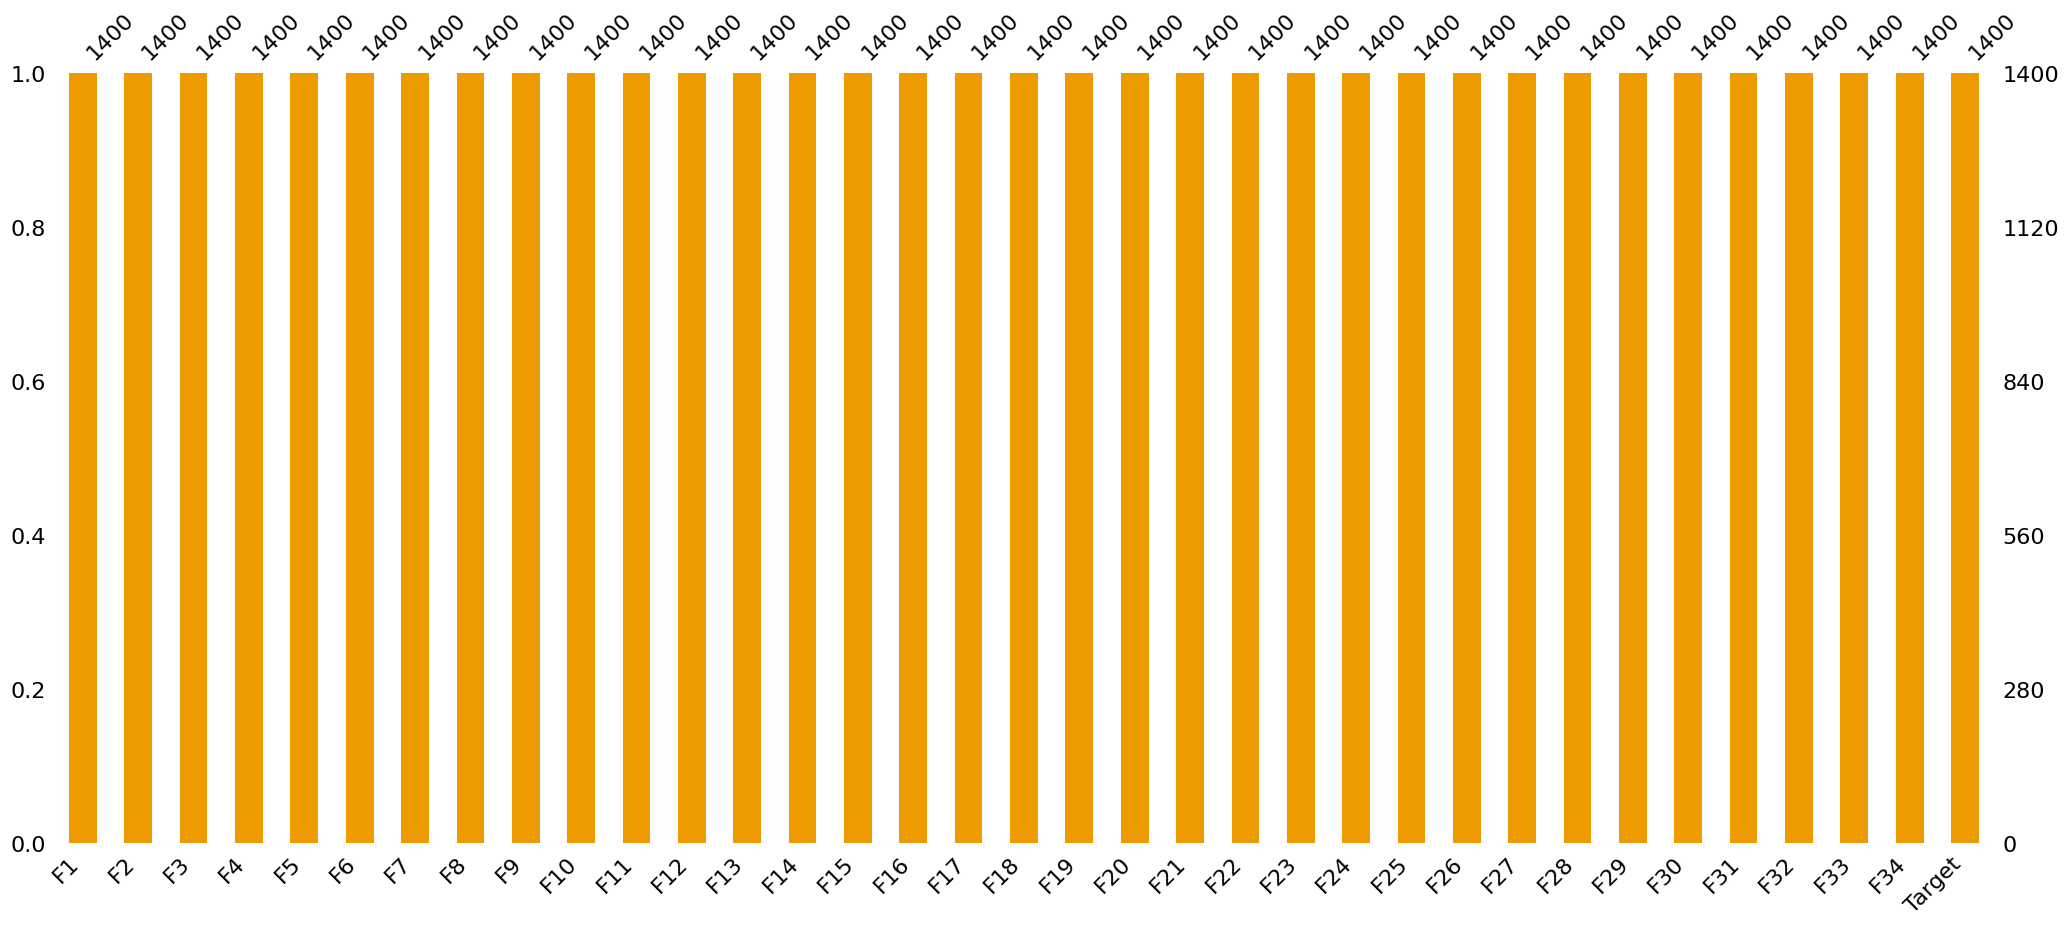

In [36]:
msno.bar(df,color = '#ee9b00')

### Correlation between features

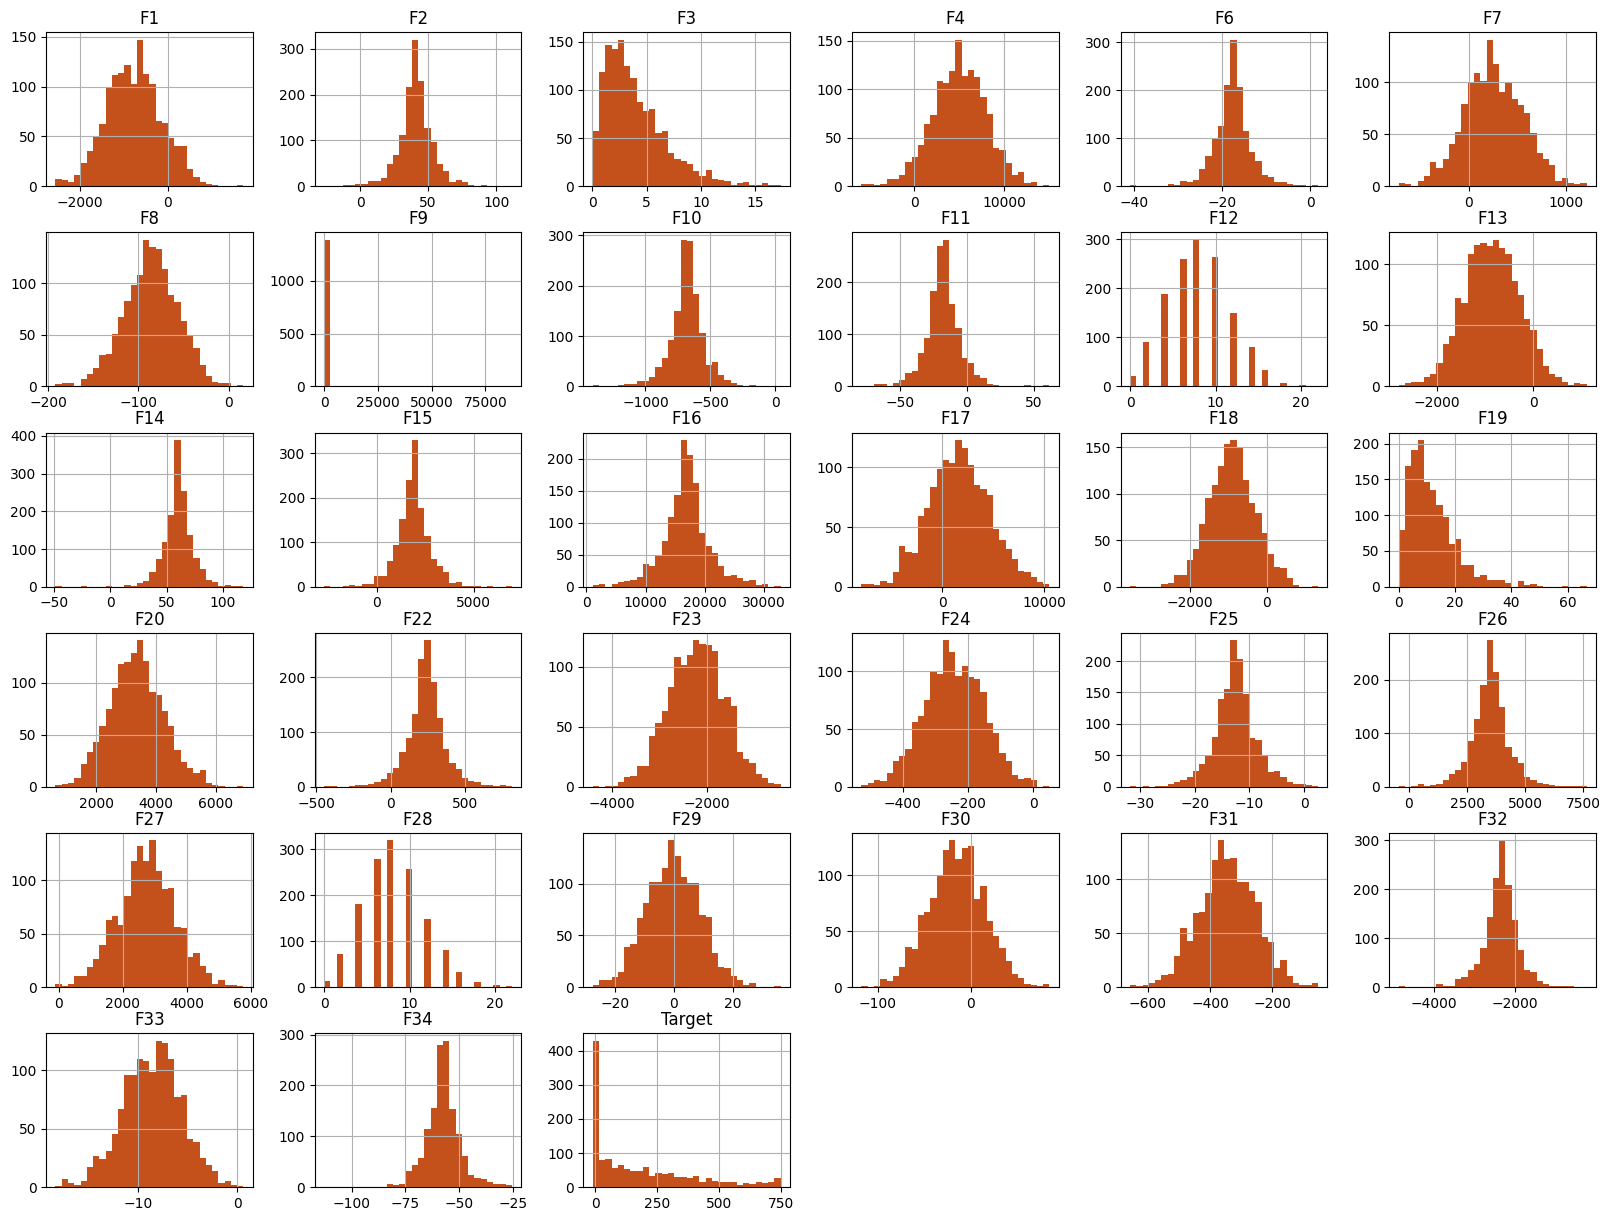

<Figure size 640x480 with 0 Axes>

In [37]:
#Check Data skewness using Bar chart
df.hist(bins=30, figsize=(20, 15), color='#c4501b')
plt.figure()
plt.show()   

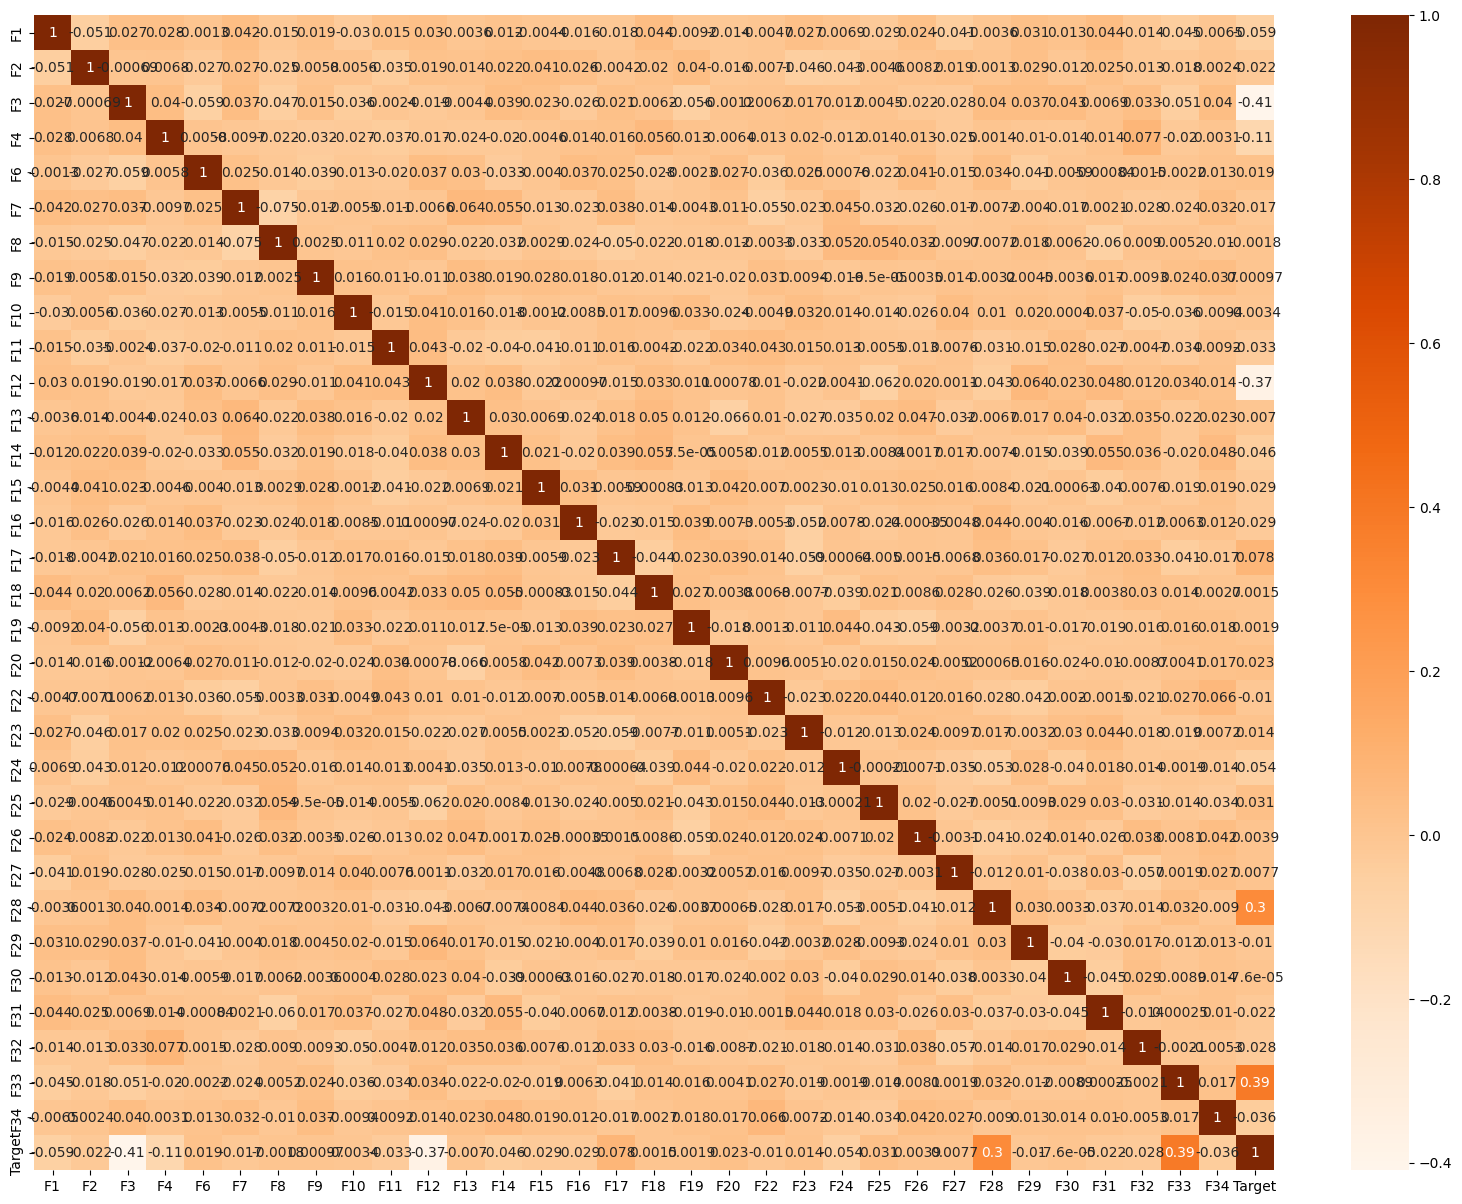

<Figure size 640x480 with 0 Axes>

In [38]:
#plotting correlation matrix
corr = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(20,15))      
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Oranges')
plt.figure()
plt.show() 

### Check for outliers

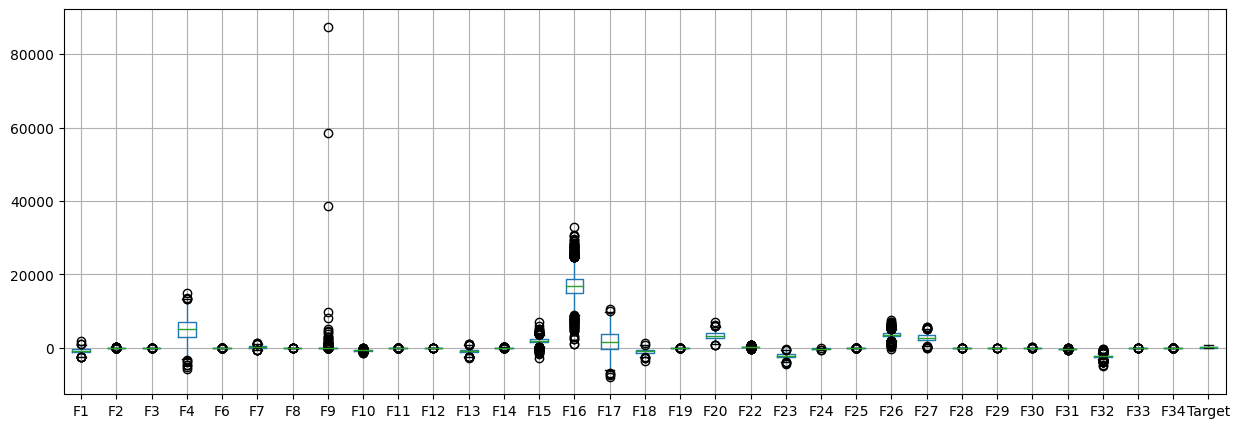

In [39]:
# Checking for outliers using boxplot
fig, ax = plt.subplots(figsize=(15,5)) 
df.boxplot()
plt.show()
    

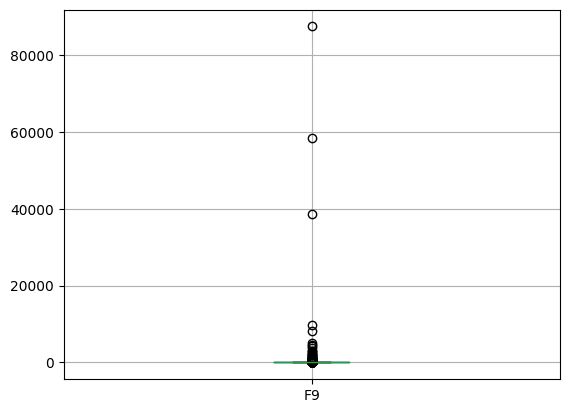

In [40]:
figure=df.boxplot(column='F9') #plotting columns which has outlier

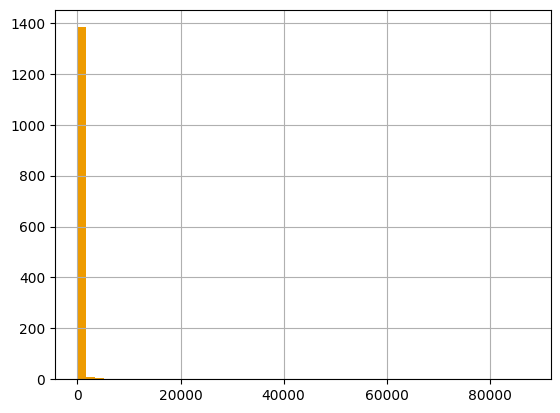

In [41]:
#Checking the data distribution 
figure=df['F9'].hist(bins=50, color='#ee9b00')

In [42]:
#method to handle outlier in the data
def IQR_handle_outlier(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    df_final=df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return df_final

In [43]:

df_outlier_cleaned=IQR_handle_outlier(df['F9'])
df_outlier_cleaned=pd.DataFrame(df_outlier_cleaned)
ind_diff=df.index.difference(df_outlier_cleaned.index)

In [44]:
ind_diff

Int64Index([  12,   24,   32,   40,   44,   51,   56,   58,   71,   73,
            ...
            1357, 1358, 1362, 1364, 1379, 1383, 1385, 1388, 1393, 1399],
           dtype='int64', length=215)

In [45]:
for i in range(0, len(ind_diff),1): # Loop through the indices in the list ind_diff
    df_final=df.drop([ind_diff[i]]) # Drop the row with the index specified by ind_diff[i]
    df=df_final                     # Update the original data by assigning it the modified data

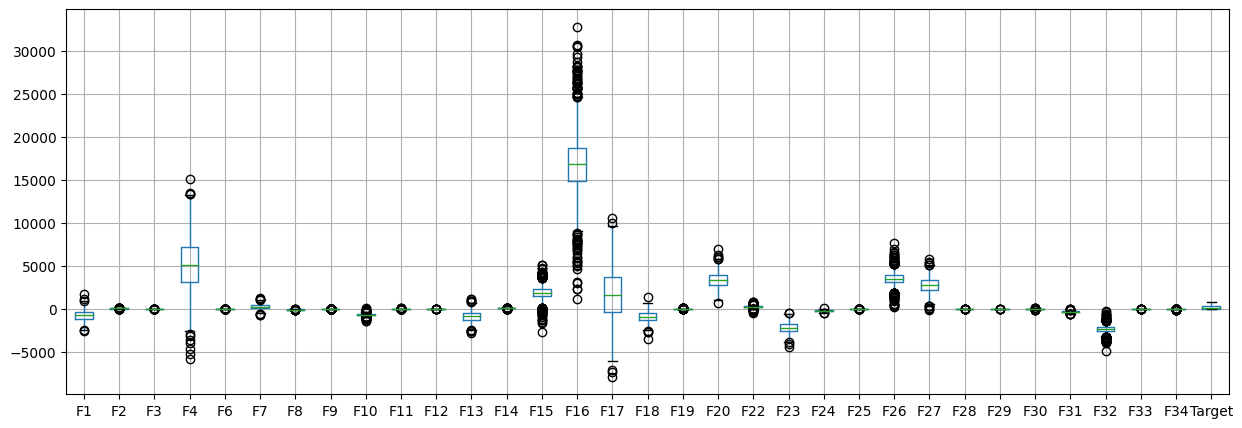

In [46]:
#box plot after handled outlier
fig, ax = plt.subplots(figsize=(15,5)) 
df.boxplot()
plt.show()

In [47]:
#@title Styling Stuff
ASCII_art = [
    """  _____                                           _    _______  _____  
 |  __ \                                         | |  / /  __ \|__ \ \ 
 | |__) |_____ ___  __ _ _   _  __ _ _ __ ___  __| | | || |__) |  ) | |
 |  _  /______/ __|/ _` | | | |/ _` | '__/ _ \/ _` | | ||  _  /  / /| |
 | | \ \      \__ \ (_| | |_| | (_| | | |  __/ (_| | | || | \ \ / /_| |
 |_|  \_\     |___/\__, |\__,_|\__,_|_|  \___|\__,_| | ||_|  \_\____| |
                      | |                             \_\          /_/ 
                      |_|                                              """,
"""  __  __                             _               _       _         ______                      
 |  \/  |                      /\   | |             | |     | |       |  ____|                     
 | \  / | ___  __ _ _ __      /  \  | |__  ___  ___ | |_   _| |_ ___  | |__   _ __ _ __ ___  _ __  
 | |\/| |/ _ \/ _` | '_ \    / /\ \ | '_ \/ __|/ _ \| | | | | __/ _ \ |  __| | '__| '__/ _ \| '__| 
 | |  | |  __/ (_| | | | |  / ____ \| |_) \__ \ (_) | | |_| | ||  __/ | |____| |  | | | (_) | |    
 |_|  |_|\___|\__,_|_| |_| /_/    \_\_.__/|___/\___/|_|\__,_|\__\___| |______|_|  |_|  \___/|_|""",
 """"  __  __                     _____                                _   ______                     
 |  \/  |                   / ____|                              | | |  ____|                    
 | \  / | ___  __ _ _ __   | (___   __ _ _   _  __ _ _ __ ___  __| | | |__   _ __ _ __ ___  _ __ 
 | |\/| |/ _ \/ _` | '_ \   \___ \ / _` | | | |/ _` | '__/ _ \/ _` | |  __| | '__| '__/ _ \| '__|
 | |  | |  __/ (_| | | | |  ____) | (_| | |_| | (_| | | |  __/ (_| | | |____| |  | | | (_) | |   
 |_|  |_|\___|\__,_|_| |_| |_____/ \__, |\__,_|\__,_|_|  \___|\__,_| |______|_|  |_|  \___/|_|   
                                      | |                                                        
                                      |_|                                                    """,
             """  _____             _     __  __                     _____                                _   ______                     
 |  __ \           | |   |  \/  |                   / ____|                              | | |  ____|                    
 | |__) |___   ___ | |_  | \  / | ___  __ _ _ __   | (___   __ _ _   _  __ _ _ __ ___  __| | | |__   _ __ _ __ ___  _ __ 
 |  _  // _ \ / _ \| __| | |\/| |/ _ \/ _` | '_ \   \___ \ / _` | | | |/ _` | '__/ _ \/ _` | |  __| | '__| '__/ _ \| '__|
 | | \ \ (_) | (_) | |_  | |  | |  __/ (_| | | | |  ____) | (_| | |_| | (_| | | |  __/ (_| | | |____| |  | | | (_) | |   
 |_|  \_\___/ \___/ \__| |_|  |_|\___|\__,_|_| |_| |_____/ \__, |\__,_|\__,_|_|  \___|\__,_| |______|_|  |_|  \___/|_|   
                                                              | |                                                        
                                                              |_|                                                        """
             
,""]


### Defining numerical and categorical features

In [48]:
#main class
class ModelSelector:
  # Initializing all the required variables
    def __init__(self,data, cat_cols, num_cols):
        self.X = data.iloc[:, :-1]
        self.y = data.iloc[:, -1]
        self.cat_cols = cat_cols
        self.num_cols = num_cols
        #Choosing model
        self.models = [
            ('Linear Regression', LinearRegression()),
            ('Gradient Boosting', GradientBoostingRegressor(random_state=50)),
            ('Ridge Regression', Ridge(alpha=1.0)),
            ('CatBoost', CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE',logging_level = 'Silent', random_seed=42))
            ]
        self.scores = {
            'r2_score': {},
            'mean_absolute_error': {},
            'mean_squared_error': {},
            'root_mean_squared_error': {}}

        self.best_model = None
         #setting up pipeline and Data pre-processing
        self.preprocessor = ColumnTransformer(transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), cat_cols)])
        

    def evaluate_models(self):
      #splitting the train and test data
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=50)
        for name, model in self.models:
            pipeline = Pipeline(steps=[('preprocessor', self.preprocessor), ('model', model)])
            kfold = KFold(n_splits=5, shuffle=True, random_state=50)
            scores = cross_val_score(pipeline, self.X, self.y, cv=kfold, scoring='neg_mean_squared_error')
            print(f'{name} cross-validation score: {(-1) * scores.mean():.3f} (+/- {scores.std():.3f})')
            # Convert negative mean scores to positive
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            #Storig model scores after train and testing
            self.scores['r2_score'][name] = r2_score(y_test, y_pred)
            self.scores['mean_absolute_error'][name] = mean_absolute_error(y_test, y_pred)
            self.scores['mean_squared_error'][name] = mean_squared_error(y_test, y_pred)
            self.scores['root_mean_squared_error'][name] = np.sqrt(mean_squared_error(y_test, y_pred))

        self.show_scores() #Plotting scores for compartion

    #This method return new pipeline with best performing model
    def get_best_model(self, metric='mean_squared_error'):
        best_model_name = min(self.scores[metric], key=self.scores[metric].get)
        self.best_model = next(model for name, model in self.models if name == best_model_name)
        return  self.best_model,self.preprocessor

    #This method print all the model's scores
    def show_scores(self):
        for metric, scores in self.scores.items():
            print(f'\n{metric}:')
            for name, score in scores.items():
                print(f'  {name}: {score:.3f}')
        self.show_results()
       
    #This method plot all the model's scores
    def show_results(self):
        data = self.scores
        color = ['#dc2f02','#e85d04','#f48c06',"#ffaa00"]
        gen_clr = self.plot_color(color)
        gen_art = self.print_ASCII_art()
        for metric in data.keys():
            color = next(gen_clr)
            print("\n###############################################################################")
            next(gen_art)
            print("\n")
            plt.figure()
            plt.bar(data[metric].keys(), data[metric].values(), color = color)
            plt.title(f'{metric} Comparison')
            plt.xlabel('Model')
            plt.ylabel(metric)
            plt.xticks(rotation=45, fontsize=8)
            plt.show()

    #Never mind : choosing color for plotig
    def plot_color(self,colors):
        for value in colors:
          yield value
    
    # Never mind : ASCII art, just for my satisfaction
    def print_ASCII_art(self):
        for value in ASCII_art:
          yield print(value) 

In [49]:
#Defining numerical and categorical features
cat_cols = ['F5','F21']
num_cols = [column for column in df.columns if column not in cat_cols and column != 'Target']

Linear Regression cross-validation score: 10281.784 (+/- 944.181)
Gradient Boosting cross-validation score: 7419.943 (+/- 619.311)
Ridge Regression cross-validation score: 10280.652 (+/- 942.919)
CatBoost cross-validation score: 5499.190 (+/- 515.797)

r2_score:
  Linear Regression: 0.782
  Gradient Boosting: 0.839
  Ridge Regression: 0.782
  CatBoost: 0.883

mean_absolute_error:
  Linear Regression: 74.194
  Gradient Boosting: 61.526
  Ridge Regression: 74.211
  CatBoost: 51.492

mean_squared_error:
  Linear Regression: 8784.339
  Gradient Boosting: 6467.540
  Ridge Regression: 8784.661
  CatBoost: 4725.395

root_mean_squared_error:
  Linear Regression: 93.725
  Gradient Boosting: 80.421
  Ridge Regression: 93.727
  CatBoost: 68.742

###############################################################################
  _____                                           _    _______  _____  
 |  __ \                                         | |  / /  __ \|__ \ \ 
 | |__) |_____ ___  __ _ _   _ 

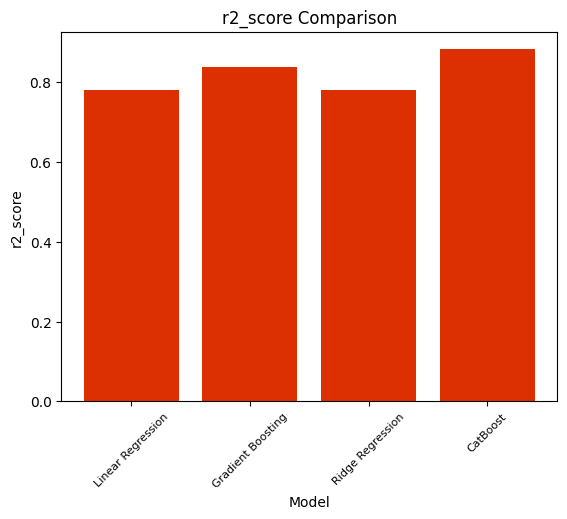


###############################################################################
  __  __                             _               _       _         ______                      
 |  \/  |                      /\   | |             | |     | |       |  ____|                     
 | \  / | ___  __ _ _ __      /  \  | |__  ___  ___ | |_   _| |_ ___  | |__   _ __ _ __ ___  _ __  
 | |\/| |/ _ \/ _` | '_ \    / /\ \ | '_ \/ __|/ _ \| | | | | __/ _ \ |  __| | '__| '__/ _ \| '__| 
 | |  | |  __/ (_| | | | |  / ____ \| |_) \__ \ (_) | | |_| | ||  __/ | |____| |  | | | (_) | |    
 |_|  |_|\___|\__,_|_| |_| /_/    \_\_.__/|___/\___/|_|\__,_|\__\___| |______|_|  |_|  \___/|_|




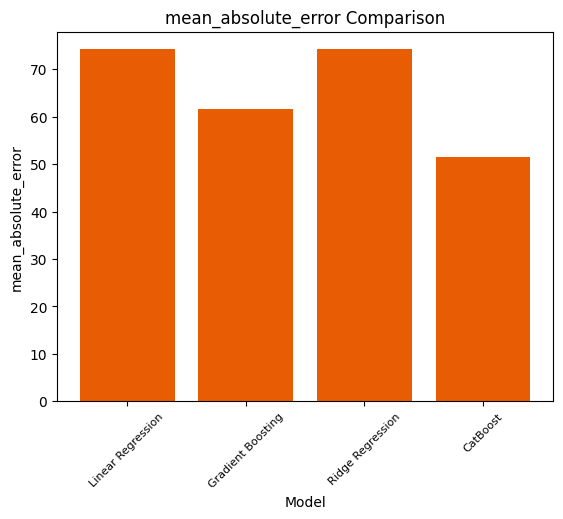


###############################################################################
"  __  __                     _____                                _   ______                     
 |  \/  |                   / ____|                              | | |  ____|                    
 | \  / | ___  __ _ _ __   | (___   __ _ _   _  __ _ _ __ ___  __| | | |__   _ __ _ __ ___  _ __ 
 | |\/| |/ _ \/ _` | '_ \   \___ \ / _` | | | |/ _` | '__/ _ \/ _` | |  __| | '__| '__/ _ \| '__|
 | |  | |  __/ (_| | | | |  ____) | (_| | |_| | (_| | | |  __/ (_| | | |____| |  | | | (_) | |   
 |_|  |_|\___|\__,_|_| |_| |_____/ \__, |\__,_|\__,_|_|  \___|\__,_| |______|_|  |_|  \___/|_|   
                                      | |                                                        
                                      |_|                                                    




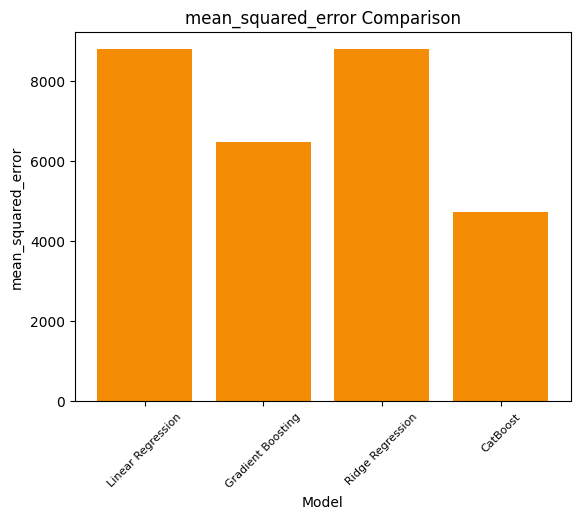


###############################################################################
  _____             _     __  __                     _____                                _   ______                     
 |  __ \           | |   |  \/  |                   / ____|                              | | |  ____|                    
 | |__) |___   ___ | |_  | \  / | ___  __ _ _ __   | (___   __ _ _   _  __ _ _ __ ___  __| | | |__   _ __ _ __ ___  _ __ 
 |  _  // _ \ / _ \| __| | |\/| |/ _ \/ _` | '_ \   \___ \ / _` | | | |/ _` | '__/ _ \/ _` | |  __| | '__| '__/ _ \| '__|
 | | \ \ (_) | (_) | |_  | |  | |  __/ (_| | | | |  ____) | (_| | |_| | (_| | | |  __/ (_| | | |____| |  | | | (_) | |   
 |_|  \_\___/ \___/ \__| |_|  |_|\___|\__,_|_| |_| |_____/ \__, |\__,_|\__,_|_|  \___|\__,_| |______|_|  |_|  \___/|_|   
                                                              | |                                                        
                                                              |_|

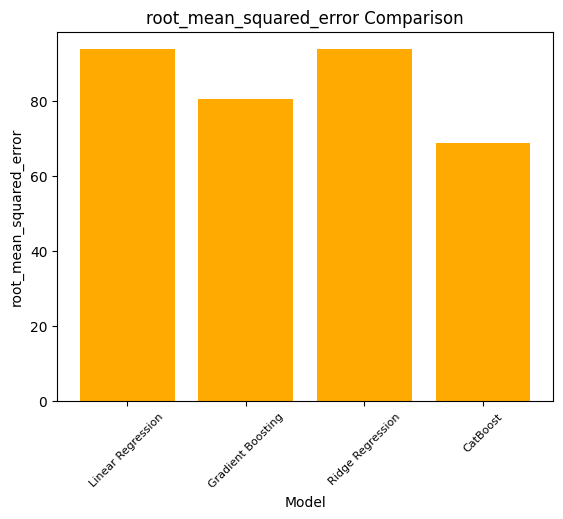

In [50]:
model_selector = ModelSelector(df, cat_cols, num_cols)

# Evaluate models and getting best model
model_selector.evaluate_models()
final_model,preprocessor = model_selector.get_best_model()


### Using the pipeline with the best model and preprocessor

In [51]:
final_model

In [52]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['F1', 'F2', 'F3', 'F4', 'F6', 'F7', 'F8',
                                  'F9', 'F10', 'F11', 'F12', 'F13', 'F14',
                                  'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
                                  'F22', 'F23', 'F24', 'F25', 'F26', 'F27',
                                  'F28', 'F29', 'F30', 'F31', 'F32', ...]),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['F5', 'F21'])])

In [53]:
pipeline_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', final_model)])
pipeline_best


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['F1', 'F2', 'F3', 'F4', 'F6',
                                                   'F7', 'F8', 'F9', 'F10',
                                                   'F11', 'F12', 'F13', 'F14',
                                                   'F15', 'F16', 'F17', 'F18',
                                                   'F19', 'F20', 'F22', 'F23',
                                                   'F24', 'F25', 'F26', 'F27',
                                                   'F28', 'F29', 'F30', 'F31',
                                                   'F32', ...]),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['F5', 'F21'])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f9f28341c00>)])

### Calculating the Root mean squared error for the test set

In [54]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('/content/CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

predicted = pipeline_best.predict(test_data) # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

models = pipeline_best.named_steps.model


# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('/content/CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])

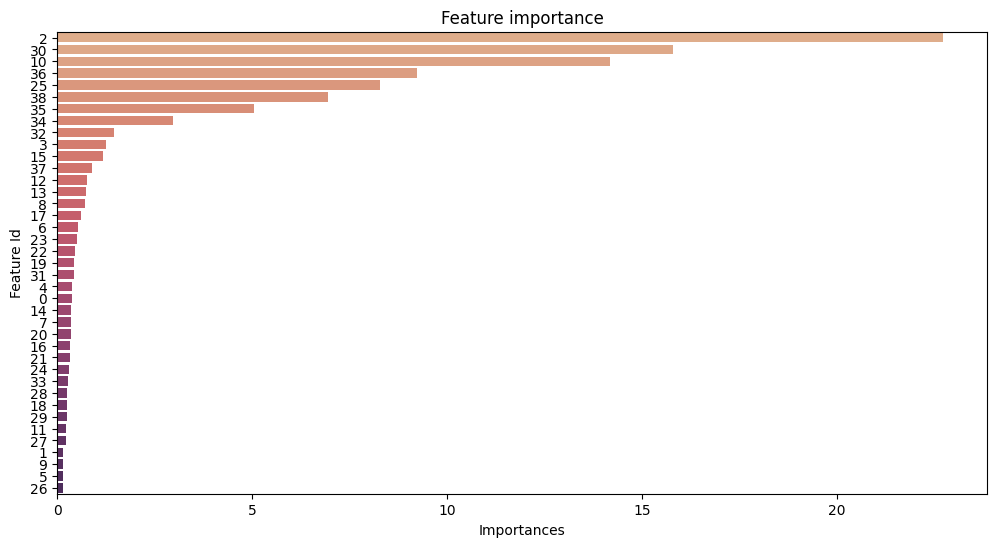

In [55]:
model = pipeline_best.named_steps.model

#plotting feature importance
feature_impt = pd.DataFrame(model.get_feature_importance(prettified=True))
plt.figure(figsize=(12, 6));
feature_plt= sns.barplot(x="Importances", y="Feature Id", data=feature_impt,palette="flare")
plt.title('Feature importance');

In [56]:
# Count values greater than 125
high_threshold = np.sum(predicted > 125)

# Count values less than 125
low_threshold= np.sum(predicted < 125)
print(high_threshold, "Patient's have high diagnostic thershold level of blood glucose level ")
print(low_threshold, "Patient's have low diagnostic thershold level of blood glucose level ")

735 Patient's have high diagnostic thershold level of blood glucose level 
565 Patient's have low diagnostic thershold level of blood glucose level 


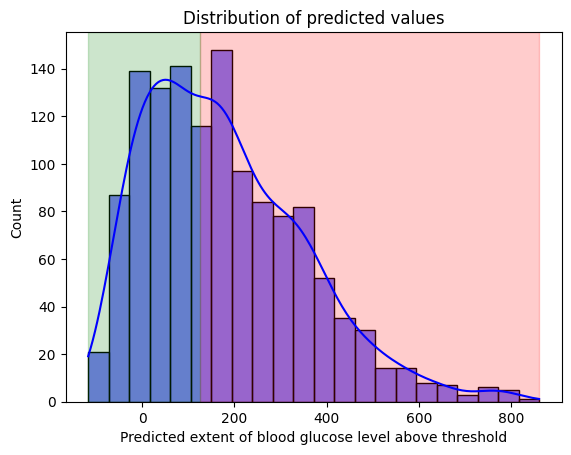

In [57]:
sns.histplot(predicted, kde=True, color='blue')
plt.axvspan(125, predicted.max(), alpha=0.2, color='red')
plt.axvspan(predicted.min(), 125, alpha=0.2, color='green')
plt.xlabel('Predicted extent of blood glucose level above threshold')
plt.ylabel('Count')
plt.title('Distribution of predicted values')
plt.show()